In [6]:
import pandas as pd
import yaml
import matplotlib as plt
import matplotlib_inline
import json

### Setup - Load Datasets

In [4]:
sales_2024 = pd.read_csv('Data/EtsySoldOrderItems2024.csv')

In [71]:
try: 
    sales_2024['slice_index'] = sales_2024['Item Name'].str.index("|")
except Exception as err: 
    print(err) 

substring not found


In [59]:
# 1. Create copy of Item Names Column 
shorten_item_name = sales_2024['Item Name']

In [69]:
#shorten_item_name[2].index('|')
sales_2024['Shorten Item Name'] = sales_2024['Item Name'].apply(lambda x: x[:x.index('|')])

ValueError: substring not found

In [54]:
sales_2024['Item Name'][0] = sales_2024['Item Name'][0][0:sales_2024['Item Name'][0].index("|")]

ValueError: substring not found

In [76]:
print(sales_2024['Item Name'].unique())

['401K Savings Plan Dashboard '
 '5K Savings Challenge | Google Sheets | Rose Pink'
 'Debt Payoff Dashboard | Google Sheets | Beige'
 'Savings Garden Dashboard | Google Sheets | 4 Color Modes | Grow and Harvest your Sinking Funds'
 'Simple 50/30/20 Budget Dashboard | Google Sheets | Capybara Theme'
 'Zero Based Budget and Bill Calendar | Google Sheets | Warm Theme | Assign every dollar a Purpose | ADHD Budget'
 'Simple 50/30/20 Budget Dashboard | Google Sheets'
 'Monthly and Annual Dashboard | Google Sheets | 9 Color Modes | Coffee Theme'
 'Blueberry Theme Travels Planning Dashboard | Google Sheets | Your Travel Companion | Research and Track all Your Trips'
 'Ultimate Debt Dashboard | Google Sheets'
 'Scrolling Content Calendar Tracker | Google Sheets | Plan and Track Content Ideas'
 'Monthly and Annual Budget Dashboard | Google Sheets | 9 Color Modes | Cow Theme'
 'Custom Dashboard - Credit Card Expense Dashboard'
 'Career Level Up Tracker | Google Sheets | Excel'
 'Household, Roomma

Models:
1. Moving Average - Baseline 
2. 

<Axes: ylabel='Item Name'>

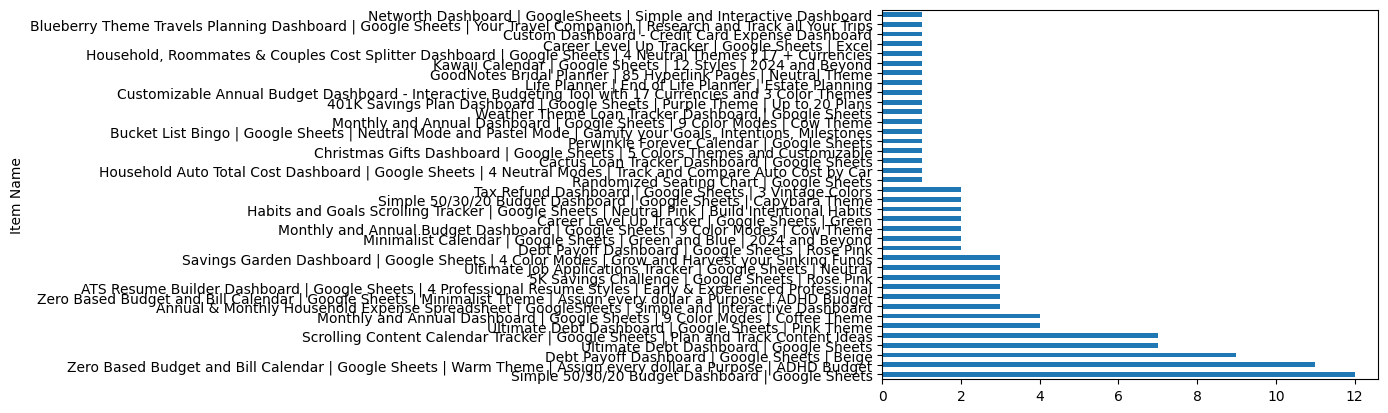

In [14]:
# Sales by Item

sales_2024['Item Name'].value_counts().plot.barh()

### Failure Dataset Data Columns Definitions

In [50]:
with open('/workspaces/FDIC/failure_properties.yaml', 'r') as f:
	data2 = yaml.load(f, Loader=yaml.SafeLoader)

failure_columns = pd.DataFrame(data2['properties']['data']['properties']).T
for column, meaning in zip(failure_columns.index, failure_columns['description']):
    print(column, meaning,'\n')

NAME This is the legal name of the institution. When available, the Institution's name links to useful information for the customers and vendors of these institutions. This information includes press releases, information about the acquiring institution, (if applicable), how your accounts and loans are affected, and how vendors can file claims against the receivership. 

CERT The certificate number assigned by the FDIC used to identify institutions and for the issuance of insurance certificates. By clicking on this number, you will link to the Institution Directory (ID) system which will provide the last demographic and financial data filed by the selected institution. 

FIN Financial Institution Number (FIN) is a unique number assigned to the institution as an Assistance Agreement, Conservatorship, Bridge Bank or Receivership. 

CITYST The city and state (or territory) of the headquarters of the institution. 

FAILDATE The date that the failed / assisted institution ceased to exist as

In [24]:
with open('/workspaces/FDIC/summary_properties.yaml', 'r') as f:
	data = yaml.load(f, Loader=yaml.SafeLoader)

#summary = pd.json_normalize(data, 'properties').assign(**data['data'])
# Print the values as a dictionary
print(data)

summary = pd.json_normalize(data['properties']['data']['properties'])


{'type': 'object', 'properties': {'data': {'type': 'object', 'properties': {'ALLOTHER': {'type': 'integer', 'x-number-unit': 'Thousands of US Dollars', 'title': 'All Other Loans', 'description': 'All Other Loans'}, 'alsonew': {'type': 'integer', 'title': 'New Charters to Absorb Another Charter', 'description': 'New savings institution charter created to absorb any other type of charter in its first quarter of operation.'}, 'ASSET': {'type': 'integer', 'x-number-unit': 'Thousands of US Dollars', 'title': 'Total Assets', 'description': 'Total Assets On A Consolidated Basis\nNote: For Banks With Foreign Operations Data For March &\nSeptember Of 1973 Through 1975 Are Reported On A\nDomestic Basis'}, 'BANKS': {'type': 'integer', 'title': 'Total Commercial Banks (Filing Y/E Call)', 'description': 'Total Insured Commercial Banks filing 12/31 fincncial report  (See Notes to User for definition of commercial bank)'}, 'BKPREM': {'type': 'integer', 'x-number-unit': 'Thousands of US Dollars', 'tit

In [26]:
summary

,ALLOTHER.type,ALLOTHER.x-number-unit,ALLOTHER.title,ALLOTHER.description,alsonew.type,alsonew.title,alsonew.description,ASSET.type,ASSET.x-number-unit,ASSET.title,...,UNINC.x-number-unit,UNINC.title,UNINC.description,UNIT.type,UNIT.title,UNIT.description,YEAR.type,YEAR.x-elastic-type,YEAR.title,YEAR.description
0,integer,Thousands of US Dollars,All Other Loans,All Other Loans,integer,New Charters to Absorb Another Charter,New savings institution charter created to abs...,integer,Thousands of US Dollars,Total Assets,...,Thousands of US Dollars,Unearned Income,Unearned Income On Loans On A Consolidated Bas...,integer,Unit Banks,Unit banks are institutions that are operating...,string,keyword,Year,Statistics reported as of end of year.


In [52]:
with open('/workspaces/FDIC/failures.json') as data_file:    
    d = json.load(data_file)  

failed_banks_details = pd.json_normalize(d, 'data').assign(**d['meta'])
failed_banks_details

,score,data.RESDATE,data.QBFDEP,data.BIDCITY,data.BIDSTATE,data.CLOSCD,data.BSTATUS,data.PSTALP,data.COMMENTS,data.CITYST,...,data.RESTYPE1,data.CHCLASS1,data.NAME,data.FSL_PROG,data.CITY,data.CERT,data.BRDATE,total,parameters,index
0,1,None,238,,,,,IL,,"EAST PEORIA, IL",...,PO,NM,FON DU LAC STATE BANK,,EAST PEORIA,NaN,,4109,NaN,NaN
1,1,6/7/1985,18798,,,,,TN,,"NASHVILLE, TN",...,PO,SL,COMMUNITY FS&LA,,NASHVILLE,31323.0,,4109,NaN,NaN
2,1,10/18/1985,15130,BROWNWOOD,TX,PASNN,I,TX,,"EARLY, TX",...,PA,NM,THE EARLY BANK,,EARLY,23024.0,,4109,NaN,NaN
3,1,8/31/1988,382716,MUSKOGEE,OK,,,OK,,"MUSKOGEE, OK",...,MGR,SL,PHOENIX FS&LA,SWP,MUSKOGEE,29625.0,,4109,NaN,NaN
4,1,None,718,,,,,WI,,"WEST MILWAUKEE, WI",...,PO,NM,ANCHOR STATE BANK,,WEST MILWAUKEE,NaN,,4109,NaN,NaN
5,1,None,554,,,,,AR,,"MARION, AR",...,PO,NM,BANK OF MARION,,MARION,NaN,,4109,NaN,NaN
6,1,10/9/1993,826792,OMAHA,NE,PAFNN,I,OK,"Received FSLIC assistance, but FSLIC closed be...","PONCA CITY, OK",...,PA,SL,FRONTIER SAVINGS & LOAN,SWP,PONCA CITY,30146.0,88-08-31,4109,NaN,NaN
7,1,8/31/1988,90205,LAWTON,OK,,,OK,,"ELK CITY, OK",...,MGR,SL,HERITAGE S&LA,SWP,ELK CITY,31988.0,,4109,NaN,NaN
8,1,8/31/1988,44404,TULSA,OK,,,OK,,"TULSA, OK",...,A/A,SB,FIRST OKLAHOMA SAVINGS BANK,SWP,TULSA,32077.0,,4109,NaN,NaN
9,1,9/1/1988,11419,COLLINS,IA,TASAN,I,IA,,"MINGO, IA",...,PA,NM,MINGO TRUST & SAVINGS BANK,,MINGO,5798.0,,4109,NaN,NaN
